# Project 2: 


- Werner Janse van Rensburg (577930) 
- Jo-Anne van der Wath (577394)
- Joshua Moll (578045)
- Omphile Tladi (577776)
- Chaleigh Storm (577716)
- Nontsikelelo Sharon Buhlungu (577878)

Link: https://github.com/Werriess/Amazon-Alexa-Customer-Sentiment-Review 

### Sentiment Analysis for Customer Reviews: Analyze customer reviews and
sentiment data to categorize them as positive, negative, or neutral, providing
insights for businesses to improve customer satisfaction.


In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import string
from collections import Counter
import plotly.express as px
import contractions

In [179]:
df = pd.read_csv('../data/amazon_alexa.tsv', sep= '\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [181]:
empty_values = df.isna().sum()
print(empty_values)

spaces_values = (df == ' ').sum()
print(spaces_values)

nan_values = df.isnull().sum()
print(nan_values)

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64
rating               0
date                 0
variation            0
verified_reviews    79
feedback             0
dtype: int64
rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


In [183]:
df.shape

(3150, 5)

In [185]:
df.dropna(inplace=True)

# Drop rows containing spaces
df = df[~(df == ' ').any(axis=1)]

# Drop rows containing empty values
df = df[df.astype(str).applymap(lambda x: x.strip() != '')]

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

print(df)

      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3065       5  30-Jul-18        Black  Dot   
3066       5  30-Jul-18        Black  Dot   
3067       5  30-Jul-18        Black  Dot   
3068       5  30-Jul-18        White  Dot   
3069       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

C:\Users\werne\AppData\Local\Temp\ipykernel_5372\3382214355.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [187]:
empty_values = df.isna().sum()
spaces_values = (df == ' ').sum()
nan_values = df.isnull().sum()

print(empty_values)
print(spaces_values)
print(nan_values)

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


In [189]:
df.shape

(3070, 5)

In [191]:
def count_words(sentence):
    return len(sentence.split())
df['Word Count'] = df['verified_reviews'].apply(lambda x: count_words(x))
df

,rating,date,variation,verified_reviews,feedback,Word Count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,31-Jul-18,Charcoal Fabric,Music,1,1
...,...,...,...,...,...,...
3065,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,8
3066,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,23
3067,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,83
3068,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,76


C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



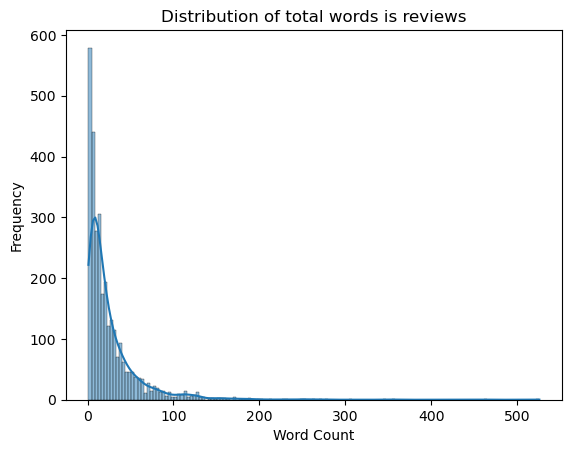

In [193]:
sns.histplot(df['Word Count'], kde=True)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of total words is reviews')
plt.show()

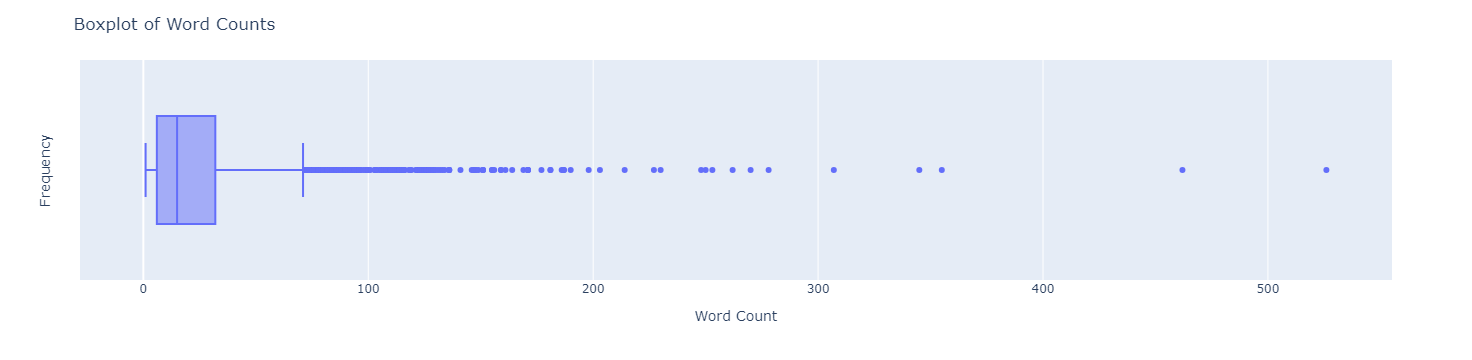

In [194]:
fig = px.box(df, x='Word Count', hover_data={'Word Count': True})

fig.update_layout(
    title='Boxplot of Word Counts',
    xaxis_title='Word Count',
    yaxis_title='Frequency'
)

fig.show()

In [195]:
df_filtered = df[df['Word Count']  <= 71]
df_filtered

,rating,date,variation,verified_reviews,feedback,Word Count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,31-Jul-18,Charcoal Fabric,Music,1,1
...,...,...,...,...,...,...
3063,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,1,8
3064,5,30-Jul-18,Black Dot,love it,1,2
3065,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,8
3066,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,23


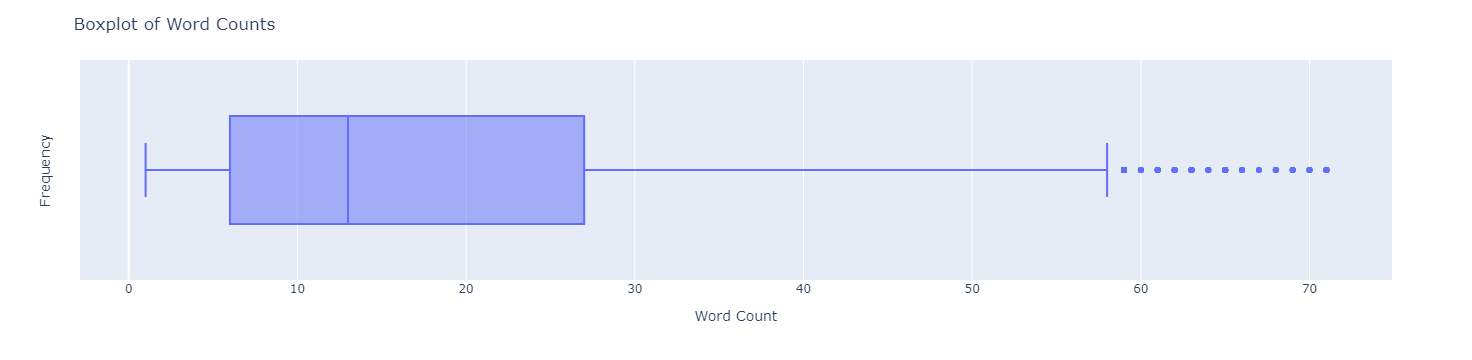

In [196]:
fig = px.box(df_filtered, x='Word Count', hover_data={'Word Count': True})

fig.update_layout(
    title='Boxplot of Word Counts',
    xaxis_title='Word Count',
    yaxis_title='Frequency'
)

fig.show()

C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



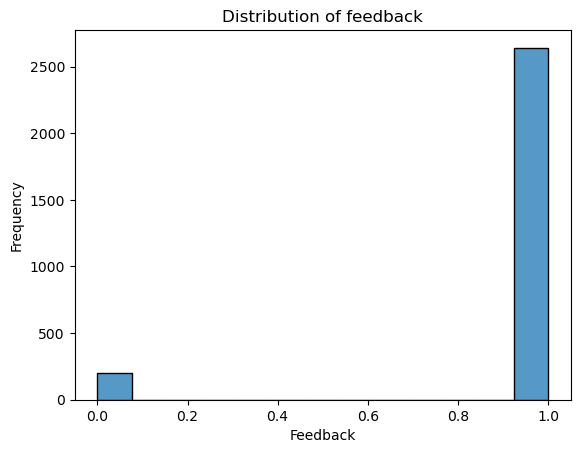

In [197]:
sns.histplot(df_filtered['feedback'])
plt.xlabel('Feedback')
plt.ylabel('Frequency')
plt.title('Distribution of feedback')
plt.show()

In [198]:
#We are going to add our data to an array
feedback_data = []

for text in df_filtered['verified_reviews']:
    feedback_data.append(text)
# feedback_data

In [199]:
text_lower = [text.lower() for text in feedback_data]
# text_lower

### Remove punctuation

In [202]:
arr_punc = [text.translate(str.maketrans('', '', string.punctuation)) for text in text_lower]
# arr_punc

In [205]:
import emoji

def remove_emojis_whitespace(text_data):
  clean_data = []
  for text in text_data:
    clean_text = emoji.replace_emoji(text, replace='')
    clean_text = clean_text.rstrip()
    clean_data.append(clean_text)
  return clean_data

clean_data = remove_emojis_whitespace(arr_punc)
# print(clean_data) 


In [207]:
import nltk
tokenized_data = [nltk.word_tokenize(text) for text in clean_data]
# tokenized_data


In [208]:
english_stopwords = set(stopwords.words('english'))

In [213]:
filtered_data = [[word for word in text if word not in english_stopwords] for text in tokenized_data]
# filtered_data

In [214]:
lm = WordNetLemmatizer()

# Lemmatize each token
lemmatized_text = [[lm.lemmatize(word) for word in text] for text in filtered_data]
# lemmatized_text

In [216]:
stemmer = PorterStemmer()
stemmed_text= [[stemmer.stem(word) for word in text] for text in lemmatized_text]
# stemmed_text

In [219]:
vocabulary = set([word for text in stemmed_text for word in text])
# vocabulary

In [221]:
pre = ' '.join(vocabulary)
# print(pre)

In [222]:
def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split()  # Split the text into words
    for word in words:
        stripped = word.strip(delims).lower()
        if any(neg in stripped for neg in ["not", "n't", "no"]):
            negation = not negation
            continue
        if negation:
            negated = "not_" + stripped
        else:
            negated = stripped
        result.append(negated)
        if any(c in word for c in delims):
            negation = False
    return result

def process(text):
    # Convert text to lower case
    text = text.lower()
    
    # Remove all punctuation in text
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove HTML code or URL links
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    
    # Fix abbreviated words
    text = contractions.fix(text)
    
    # Tokenize and handle negation
    tokens = negate_sequence(text)
    
    lemmatizer = WordNetLemmatizer()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    
    lemmatized_tokens = []
    
    for token in tokens:
        if token in stop_words:
            continue
        
        # Lemmatization
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)
        
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

In [224]:
df_filtered['verified_reviews'] = df_filtered['verified_reviews'].apply(process)
df_filtered 


C:\Users\werne\AppData\Local\Temp\ipykernel_5372\3924816389.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,rating,date,variation,verified_reviews,feedback,Word Count
0,5,31-Jul-18,Charcoal Fabric,love echo,1,3
1,5,31-Jul-18,Charcoal Fabric,loved,1,2
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1,38
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns not_i not_contro...,1,34
4,5,31-Jul-18,Charcoal Fabric,music,1,1
...,...,...,...,...,...,...
3063,5,30-Jul-18,Black Dot,awesome device wish bought one age ago,1,8
3064,5,30-Jul-18,Black Dot,love,1,2
3065,5,30-Jul-18,Black Dot,perfect kid adult everyone,1,8
3066,5,30-Jul-18,Black Dot,listening music searching location checking ti...,1,23


In [225]:
sid = SentimentIntensityAnalyzer()

sentiments = df_filtered['verified_reviews'].apply(
    lambda x: sid.polarity_scores(x)['compound']
)
sentiments

0       0.6369
1       0.5994
2       0.0516
3       0.5106
4       0.0000
         ...  
3063    0.7783
3064    0.6369
3065    0.5719
3066    0.0000
3069    0.4404
Name: verified_reviews, Length: 2838, dtype: float64

In [227]:
sentiment_class = sentiments.apply(
    lambda x: 'positive' if x > 0 else ('neutral' if x == np.isneginf(x) else 'negative')
)

In [231]:
df_with_sentiment = pd.DataFrame({
    'Review': df_filtered['verified_reviews'], 
     'Sentiment': sentiment_class
})

df_with_sentiment

,Review,Sentiment
0,love echo,positive
1,loved,positive
2,sometimes playing game answer question correct...,positive
3,lot fun thing 4 yr old learns not_i not_contro...,positive
4,music,neutral
...,...,...
3063,awesome device wish bought one age ago,positive
3064,love,positive
3065,perfect kid adult everyone,positive
3066,listening music searching location checking ti...,neutral


In [232]:
df_with_sentiment['Sentiment'] = df_with_sentiment['Sentiment'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'neutral' else -1))

df_with_sentiment

,Review,Sentiment
0,love echo,1
1,loved,1
2,sometimes playing game answer question correct...,1
3,lot fun thing 4 yr old learns not_i not_contro...,1
4,music,0
...,...,...
3063,awesome device wish bought one age ago,1
3064,love,1
3065,perfect kid adult everyone,1
3066,listening music searching location checking ti...,0


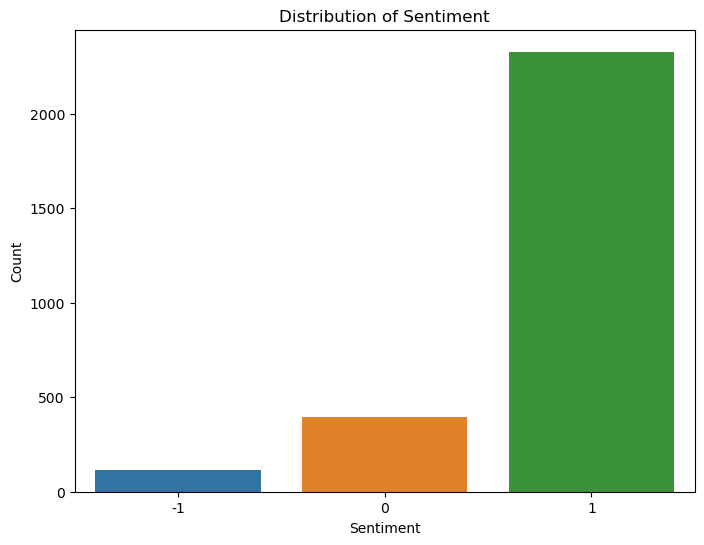

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df_with_sentiment['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [234]:
positiveFD = nltk.FreqDist(word for text in df_with_sentiment[df_with_sentiment["Sentiment"] == 1]["Review"] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in df_with_sentiment[df_with_sentiment["Sentiment"] == -1]["Review"] for word in text.lower().split())
neutralFD = nltk.FreqDist(word  for text in df_with_sentiment[df_with_sentiment["Sentiment"] == 0]["Review"] for word in text.lower().split())

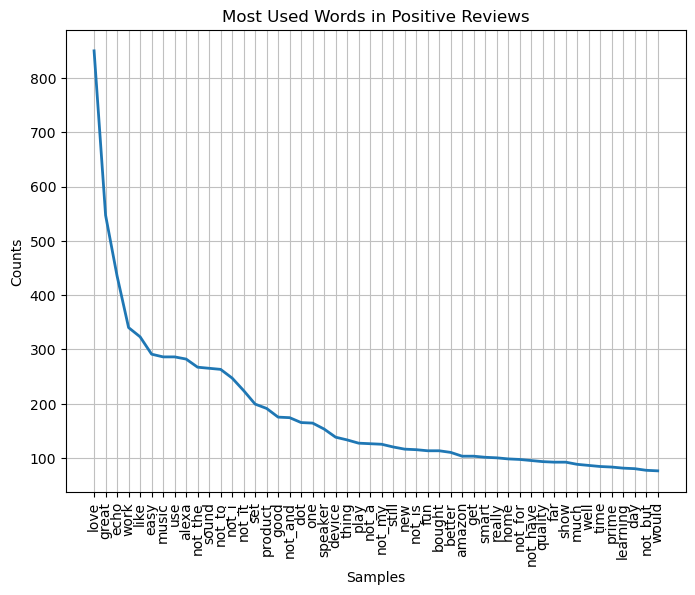

In [235]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Positive Reviews")
positiveFD.plot(50)
plt.show()

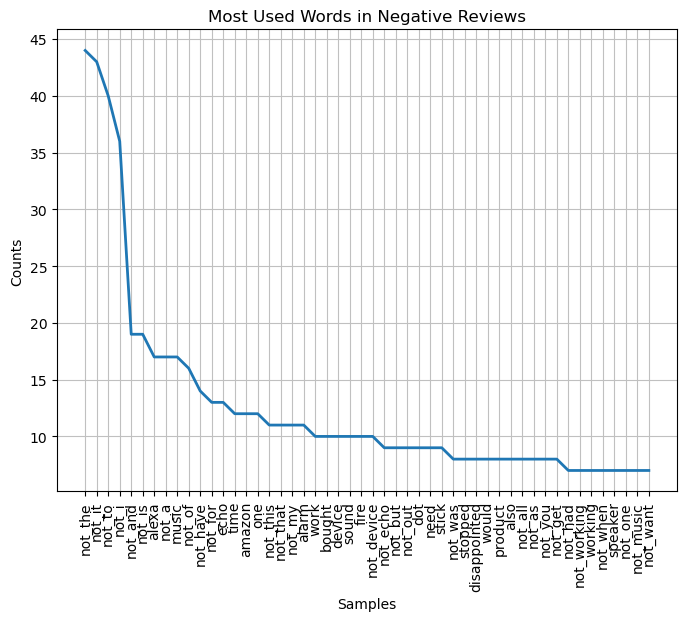

In [236]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Negative Reviews")
negativeFD.plot(50)
plt.show()

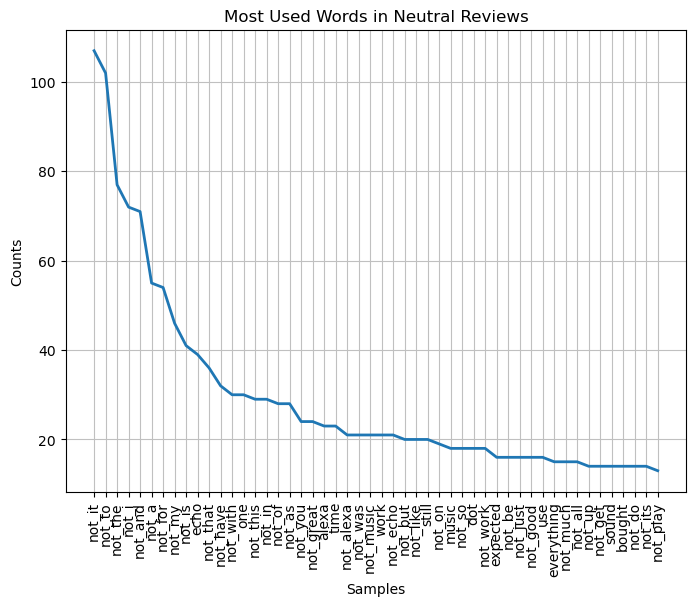

In [238]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Neutral Reviews")
neutralFD.plot(50)
plt.show()

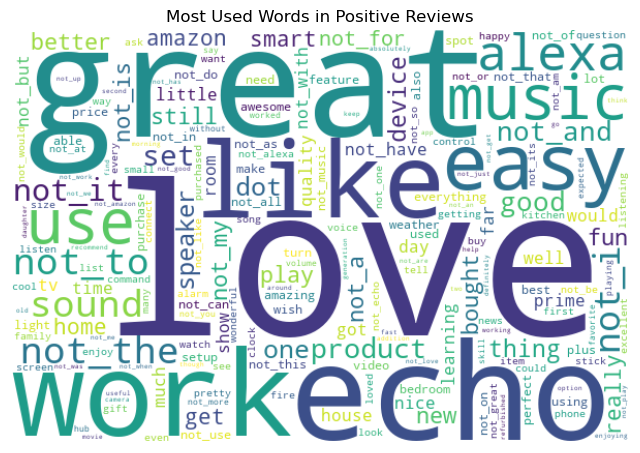

In [239]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(positiveFD)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used Words in Positive Reviews")
plt.axis('off')  
plt.show()

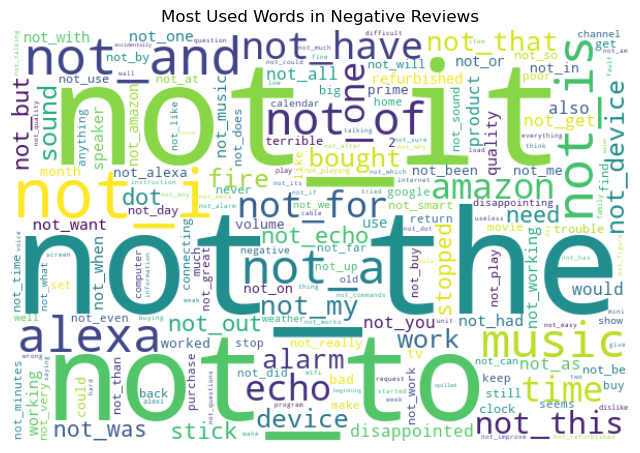

In [244]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(negativeFD)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used Words in Negative Reviews")
plt.axis('off')  
plt.show()

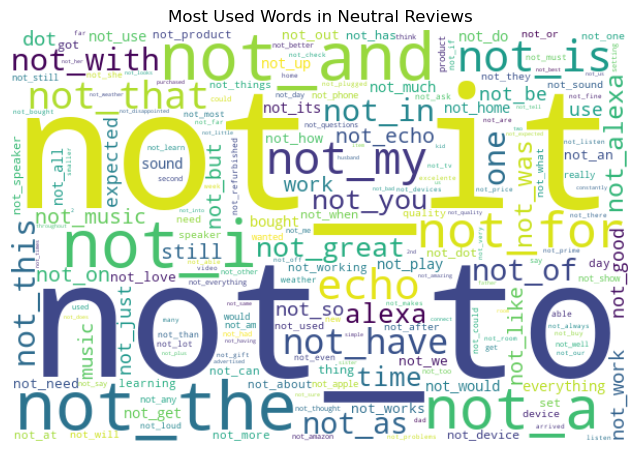

In [245]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(neutralFD)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used Words in Neutral Reviews")
plt.axis('off')  
plt.show()

In [248]:
df_with_sentiment[df_with_sentiment['Sentiment'] == -1]

,Review,Sentiment
145,alexa since beginning accidentally spilled wat...,-1
161,stopped working 2 week not_follow not_commands...,-1
175,sad joke worthless,-1
185,really disappointed alexa plugin wall socket t...,-1
247,trouble connecting tv not_exactly not_tech not...,-1
...,...,...
2985,work well disappointed speaker quality hooked ...,-1
2993,negative product terrible sound quality massiv...,-1
3013,dislike volume not_sound not_loud,-1
3045,dislike confuses request time,-1


In [249]:
def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split()  # Split the text into words
    for word in words:
        stripped = word.strip(delims).lower()
        if any(neg in stripped for neg in ["not", "n't", "no"]):
            negation = not negation
            continue
        if negation:
            negated = "not_" + stripped
        else:
            negated = stripped
        result.append(negated)
        if any(c in word for c in delims):
            negation = False
    return result

def process(text):
    # Convert text to lower case
    text = text.lower()
    
    # Remove all punctuation in text
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove HTML code or URL links
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    
    # Fix abbreviated words
    text = contractions.fix(text)
    
    # Tokenize and handle negation
    tokens = negate_sequence(text)
    
    lemmatizer = WordNetLemmatizer()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    
    lemmatized_tokens = []
    
    for token in tokens:
        if token in stop_words:
            continue
        
        # Lemmatization
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)
        
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

df_with_sentiment['Review'].apply(process)

0                                               love echo
1                                                   loved
2       sometimes playing game answer question correct...
3                           lot fun thing 4 yr old learns
4                                                   music
                              ...                        
3063               awesome device wish bought one age ago
3064                                                 love
3065                           perfect kid adult everyone
3066    listening music searching location checking ti...
3069                                                 good
Name: Review, Length: 2838, dtype: object

In [250]:
df_with_sentiment

,Review,Sentiment
0,love echo,1
1,loved,1
2,sometimes playing game answer question correct...,1
3,lot fun thing 4 yr old learns not_i not_contro...,1
4,music,0
...,...,...
3063,awesome device wish bought one age ago,1
3064,love,1
3065,perfect kid adult everyone,1
3066,listening music searching location checking ti...,0


# SVM Model


In [253]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import joblib

X = df_with_sentiment[['Review']]  
y = df_with_sentiment['Sentiment']

oversampler = RandomOverSampler()

X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['Review']) 
X_test_vectorized = vectorizer.transform(X_test['Review'])        

svm_model = SVC(kernel='linear')  
svm_model.fit(X_train_vectorized, y_train)
joblib.dump(svm_model, '../artifacts/model1.pkl')

y_pred = svm_model.predict(X_test_vectorized)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       458
           0       0.98      1.00      0.99       467
           1       1.00      0.97      0.99       472

    accuracy                           0.99      1397
   macro avg       0.99      0.99      0.99      1397
weighted avg       0.99      0.99      0.99      1397



# Naive Bayes Model

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import joblib

X = df_with_sentiment[['Review']]  
y = df_with_sentiment['Sentiment']

oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['Review']) 
X_test_vectorized = vectorizer.transform(X_test['Review'])

nb_model = MultinomialNB()  
nb_model.fit(X_train_vectorized, y_train)
joblib.dump(nb_model, '../artifacts/model2.pkl')

y_pred = nb_model.predict(X_test_vectorized)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.95      1.00      0.98       458
           0       0.94      0.92      0.93       467
           1       0.95      0.92      0.94       472

    accuracy                           0.95      1397
   macro avg       0.95      0.95      0.95      1397
weighted avg       0.95      0.95      0.95      1397



In [256]:
def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split()
    prev = None
    pprev = None
    for word in words:
        stripped = word.strip(delims).lower()
        negated = "not_" + stripped if negation else stripped
        result.append(negated)
        if prev:
            bigram = prev + " " + negated
            result.append(bigram)
            if pprev:
                trigram = pprev + " " + bigram
                result.append(trigram)
            pprev = prev
        prev = negated

        if any(neg in word for neg in ["not", "n't", "no"]):
            negation = not negation

        if any(c in word for c in delims):
            negation = False

    return result

def process(text):
    # Convert text to lower case
    text = text.lower()
    
    # Remove all punctuation in text
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove HTML code or URL links
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    
    # Fix abbreviated words
    text = contractions.fix(text)
    
    # Tokenize and handle negation
    tokens = negate_sequence(text)
    
    lemmatizer = WordNetLemmatizer()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    
    lemmatized_tokens = []
    
    for token in tokens:
        if token in stop_words:
            continue
        
        # Lemmatization
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)
        
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

your_text = "Best product ever purchased"
processed_text = process(your_text)

vectorized_text = vectorizer.transform([processed_text])

model = joblib.load('../artifacts/model1.pkl')

predicted_sentiment = model.predict(vectorized_text)[0]

if predicted_sentiment == -1:
    print("Negative Sentiment")
elif predicted_sentiment == 0:
    print("Neutral Sentiment")
else:
    print("Positive Sentiment")

Positive Sentiment


In [258]:
def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split()
    prev = None
    pprev = None
    for word in words:
        stripped = word.strip(delims).lower()
        negated = "not_" + stripped if negation else stripped
        result.append(negated)
        if prev:
            bigram = prev + " " + negated
            result.append(bigram)
            if pprev:
                trigram = pprev + " " + bigram
                result.append(trigram)
            pprev = prev
        prev = negated

        if any(neg in word for neg in ["not", "n't", "no"]):
            negation = not negation

        if any(c in word for c in delims):
            negation = False

    return result

def process(text):
    # Convert text to lower case
    text = text.lower()
    
    # Remove all punctuation in text
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove HTML code or URL links
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    
    # Fix abbreviated words
    text = contractions.fix(text)
    
    # Tokenize and handle negation
    tokens = negate_sequence(text)
    
    lemmatizer = WordNetLemmatizer()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    
    lemmatized_tokens = []
    
    for token in tokens:
        if token in stop_words:
            continue
        
        # Lemmatization
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)
        
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text


your_text = "Won't but this horrible product ever again"
processed_text = process(your_text)

# Vectorize the processed text
vectorized_text = vectorizer.transform([processed_text])

print(vectorized_text)
model2 = joblib.load('../artifacts/model2.pkl')
# Make predictions
predicted_sentiment = model2.predict(vectorized_text)[0]

# Interpret results
if predicted_sentiment == -1:
    print("Negative Sentiment")
elif predicted_sentiment == 0:
    print("Neutral Sentiment")
else:
    print("Positive Sentiment")

  (0, 2547)	0.32365902055862855
  (0, 2254)	0.4666523750498855
  (0, 1931)	0.5337557908404426
  (0, 1762)	0.4819642058305907
  (0, 1552)	0.3264267933980001
  (0, 1416)	0.23182150000724996
Neutral Sentiment


In [259]:
#libraries
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
import contractions
import dash_table

# Load the model and vectorizer
model = joblib.load("../artifacts/model2.pkl")

#initialise dash app
app = dash.Dash(__name__)
server = app.server

# Sample DataFrame (replace this with your actual DataFrame)
df = pd.DataFrame({
    'rating': [5, 4, 3, 2, 1, 5],
    'date': ['2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04', '2024-05-05','2024-05-05'],
    'variation': ['Charcoal Fabric', 'Walnut Finish', 'Heather Gray Fabric', 'Sandstone Fabric', 'Oak Finish', 'Sandstone Fabric'],
    'verified_reviews': ['Love my Echo!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'Not what I expected', 'Disappointed', 'Worst purchase ever', 'MLG makes me tired!!']
})

# Define columns for DataTable
columns = [{"name": i, "id": i} for i in df.columns]

variation_options = [{'label': variation, 'value': variation.lower().replace(' ', '_')} for variation in df['variation'].unique()]


app.layout = html.Div(
    className='app-container', 
    style = {'background-color' : '#1d7874'},
    children=[
        html.H1('Amazon Alexa Review',
            style={ 'padding': '10px 20px',
                        'margin-top': '20px',
                        'font-family': 'calibri',
                        'font-weight': '600',
                        'font-size':'2em',
                        'color': '#071e22',
                        'width': '500px',
                        'text-align': 'center'}),
        html.Div( 
            className='content',
            style = {'background-color' : '#071e22',
                    'color': 'white',
                    'width':'200',
                    'font-family':'calibri',
                    'padding':'50px'},
            children=[
                html.Div([
                    html.Label('Rating', style={'display': 'block', 
                                                'margin-left': '25px',
                                                'font-size':'20px'}),
                    dcc.Slider(
                        id='rating-slider',
                        min=1,
                        max=5,
                        step=1,
                        value=3,  # Set default value here
                        marks={i: str(i) for i in range(1, 6)},
                    )
                ], className='rating-container',
                style={'width':'500px'}), 
                html.Div([
                    html.Label('Date', style={'display': 'block',
                                                'margin-left': '25px',
                                                'font-size':'20px'}),
                    dcc.DatePickerSingle(
                        id='date-picker',
                        date=None,
                        style={'margin-left': '25px'}
                    )
                ], className='date-container'), 
                html.Div([
                    html.Div([
                        html.Label('Variation', style={'display': 'block',
                                                        'margin-top':'20px',
                                                'margin-left': '25px',
                                                'color': 'white',
                                                'font-size':'20px'}),
                        dcc.Dropdown(
                            id='variation-dropdown',
                            options=variation_options,
                            value=None,
                            style={'margin-left': '13px', 'width': '465px', 'height': '50px', 'font-size':'22px', 'color': '#071e22'}
                        )
                    ], className='variation-container'),  
                    html.Div([
                        html.Label('Review', style={'display':'block',
                                                    'margin-top':'20px',
                                                    'margin-left': '25px',
                                                'font-size':'20px'}),
                        dcc.Textarea(
                            id='review-text',
                            value='',
                            style={'margin-left':'25px',
                                    'width':'460px',
                                    'height': '150px',
                                    'font-size':'large',
                                    'color':'#071e22'}
                        )
                    ], className='review-container'),  
                    html.Button('Submit', 
                                id='submit-val', 
                                n_clicks=0,
                                style={'background-color': '#1d7874',
                                        'color': 'white',
                                        'padding': '10px',
                                        'border': '1px solid transparent',
                                        'border-radius' : '10px',
                                        'margin-top':'10px',
                                        'margin-left':'25px'}),
                    html.Div(id='output-div')
                ], className='review-section'),
                html.Div([
                    html.H3('Amazon Reviews'),
                    html.Div(
                        dcc.Loading(
                            id='loading-table',
                            type='circle',
                            children=[
                                html.Div(
                                    dash_table.DataTable(
                                        id='review-table',
                                        columns=columns,
                                        data=df.to_dict('records'),
                                        page_size=10,  # Set the number of rows per page
                                        style_table={'overflowX': 'auto'},  # Enable horizontal scroll
                                        style_cell={'minWidth': '150px', 'width': '150px', 'maxWidth': '150px'},  # Set column width
                                        style_header={'backgroundColor': 'rgb(30, 30, 30)', 'color': 'white'},  # Set header style
                                        style_data={'backgroundColor': 'rgb(50, 50, 50)', 'color': 'white'},  # Set data style
                                        row_selectable='single',  # Allow only single row selection
                                        selected_rows=[]  # Initialize selected rows to empty list
                                    )
                                )
                            ]
                        )
                    )
                ], style={'overflowY': 'auto', 'height': '300px', 'margin-top': '20px', 'margin-left': '25px'})
            ]
        )
    ]
)

@app.callback(
    Output(component_id='rating-slider', component_property='value'),
    Output(component_id='date-picker', component_property='date'),
    Output(component_id='variation-dropdown', component_property='value'),
    Output(component_id='review-text', component_property='value'),
    Input(component_id='review-table', component_property='selected_rows'),
    State(component_id='review-table', component_property='data')
)
def update_inputs(selected_rows, data):
    if selected_rows:
        selected_row_index = selected_rows[0]
        selected_row = data[selected_row_index]
        rating = selected_row['rating']
        date = selected_row['date']
        variation = selected_row['variation']
        review = selected_row['verified_reviews']
        return rating, date, variation, review
    else:
        return 3, None, None, ''

@app.callback(
    Output(component_id='output-div', component_property='children'),
    Input(component_id='submit-val', component_property='n_clicks'),
    State('review-text', 'value')
)
def update_output(n_clicks, review_text):
    if n_clicks > 0 and review_text:  # Check if review text is not empty
        # Preprocess the review text
        processed_text = process(review_text)

        # Vectorize the processed text
        vectorized_text = vectorizer.transform([processed_text])

        # Make predictions
        predicted_sentiment = model.predict(vectorized_text)[0]

        # Interpret results
        if predicted_sentiment == -1:
            sentiment = "Negative Sentiment"
        elif predicted_sentiment == 0:
            sentiment = "Neutral Sentiment"
        else:
            sentiment = "Positive Sentiment"  

        return html.Div([
            html.H3("Predicted Sentiment:"),
            html.P(sentiment)
        ])
    else:
        return None  

def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split()
    prev = None
    pprev = None
    for word in words:
        stripped = word.strip(delims).lower()
        negated = "not_" + stripped if negation else stripped
        result.append(negated)
        if prev:
            bigram = prev + " " + negated
            result.append(bigram)
            if pprev:
                trigram = pprev + " " + bigram
                result.append(trigram)
            pprev = prev
        prev = negated

        if any(neg in word for neg in ["not", "n't", "no"]):
            negation = not negation

        if any(c in word for c in delims):
            negation = False

    return result

def process(text):
    # Convert text to lower case
    text = text.lower()
    
    # Remove all punctuation in text
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove HTML code or URL links
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    
    # Fix abbreviated words
    text = contractions.fix(text)
    
    # Tokenize and handle negation
    tokens = negate_sequence(text)
    
    lemmatizer = WordNetLemmatizer()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    
    lemmatized_tokens = []
    
    for token in tokens:
        if token in stop_words:
            continue
        
        # Lemmatization
        lemma = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemma)
        
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

if __name__ == '__main__':
    app.run_server(port=8040, debug = True)